In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# load data
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data', header=None)

In [3]:
# look at data
data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:
# rename last column to label
data.rename(columns={60: "label"}, inplace=True)

In [5]:
# inspect data column size & type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
0        208 non-null float64
1        208 non-null float64
2        208 non-null float64
3        208 non-null float64
4        208 non-null float64
5        208 non-null float64
6        208 non-null float64
7        208 non-null float64
8        208 non-null float64
9        208 non-null float64
10       208 non-null float64
11       208 non-null float64
12       208 non-null float64
13       208 non-null float64
14       208 non-null float64
15       208 non-null float64
16       208 non-null float64
17       208 non-null float64
18       208 non-null float64
19       208 non-null float64
20       208 non-null float64
21       208 non-null float64
22       208 non-null float64
23       208 non-null float64
24       208 non-null float64
25       208 non-null float64
26       208 non-null float64
27       208 non-null float64
28       208 non-null float64
29       208 non-null flo

In [6]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


# 1. EDA

In [7]:
data['label'].value_counts()

M    111
R     97
Name: label, dtype: int64

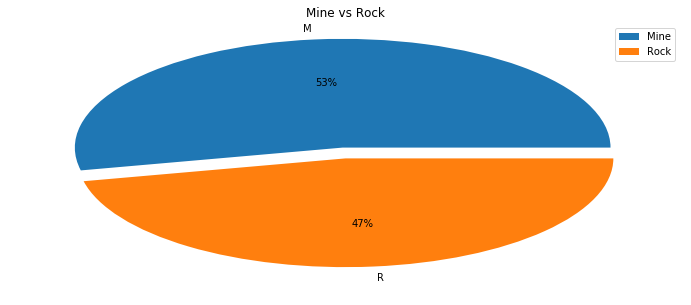

In [8]:
plt.figure(figsize=(12,5))

plt.pie(x = data['label'].value_counts().values, 
        explode = (0.1,0),
        autopct = '%1.0f%%',
        labels = data['label'].value_counts().index)


plt.title('Mine vs Rock')
plt.legend(['Mine','Rock'])
plt.show()

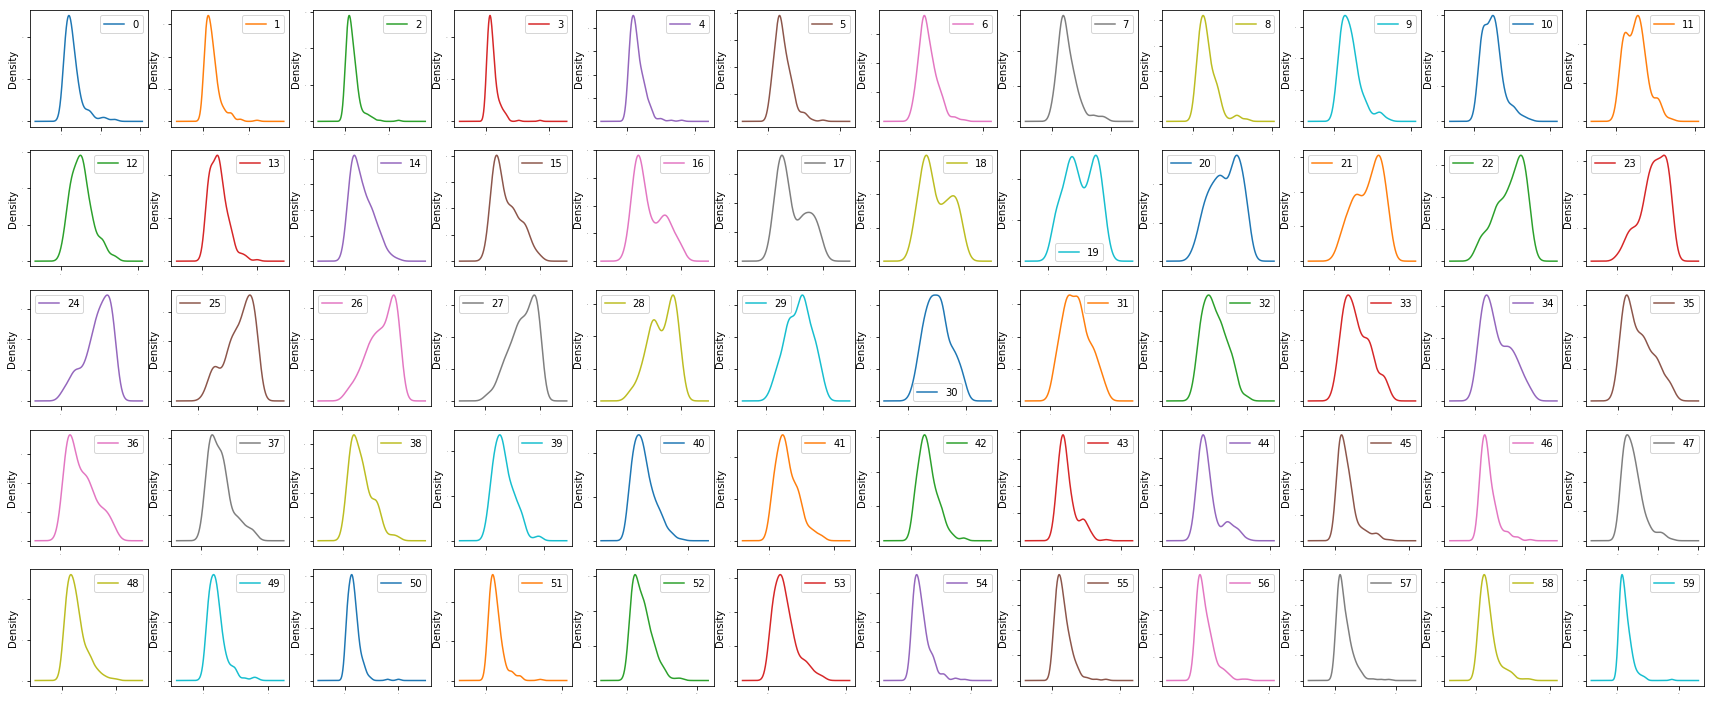

<Figure size 432x288 with 0 Axes>

In [9]:
data.plot(figsize=(30,15),kind='kde',subplots=True, sharex=False, sharey=False, layout=(6,12), fontsize=1)

plt.show()
plt.tight_layout()

In [10]:
data.corr()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,1.000000,0.735896,0.571537,0.491438,0.344797,0.238921,0.260815,0.355523,0.353420,0.318276,...,0.254450,0.355299,0.311729,0.322299,0.312067,0.220642,0.313725,0.368132,0.357116,0.347078
1,0.735896,1.000000,0.779916,0.606684,0.419669,0.332329,0.279040,0.334615,0.316733,0.270782,...,0.320538,0.434548,0.346076,0.383960,0.380165,0.262263,0.280341,0.353042,0.352200,0.358761
2,0.571537,0.779916,1.000000,0.781786,0.546141,0.346275,0.190434,0.237884,0.252691,0.219637,...,0.238110,0.394076,0.332914,0.367186,0.289731,0.287661,0.380819,0.334108,0.425047,0.373948
3,0.491438,0.606684,0.781786,1.000000,0.726943,0.352805,0.246440,0.246742,0.247078,0.237769,...,0.174676,0.374651,0.364772,0.334211,0.284955,0.280938,0.340254,0.344865,0.420266,0.400626
4,0.344797,0.419669,0.546141,0.726943,1.000000,0.597053,0.335422,0.204006,0.177906,0.183219,...,0.115936,0.266617,0.314985,0.205306,0.196472,0.199323,0.219395,0.238793,0.290982,0.253710
5,0.238921,0.332329,0.346275,0.352805,0.597053,1.000000,0.702889,0.471683,0.327578,0.288621,...,0.171767,0.252288,0.162404,0.164073,0.133464,0.166758,0.161333,0.203986,0.220573,0.178158
6,0.260815,0.279040,0.190434,0.246440,0.335422,0.702889,1.000000,0.675774,0.470580,0.425448,...,0.184152,0.144051,0.046403,0.163074,0.195541,0.174143,0.186324,0.242646,0.183578,0.222493
7,0.355523,0.334615,0.237884,0.246742,0.204006,0.471683,0.675774,1.000000,0.778577,0.652525,...,0.260692,0.219038,0.102447,0.234008,0.239551,0.276819,0.267212,0.287603,0.194400,0.146216
8,0.353420,0.316733,0.252691,0.247078,0.177906,0.327578,0.470580,0.778577,1.000000,0.877131,...,0.174873,0.207996,0.105352,0.202615,0.179342,0.232764,0.193963,0.231745,0.097293,0.095243
9,0.318276,0.270782,0.219637,0.237769,0.183219,0.288621,0.425448,0.652525,0.877131,1.000000,...,0.167096,0.165537,0.097544,0.146725,0.175254,0.151889,0.140327,0.212277,0.058273,0.097358


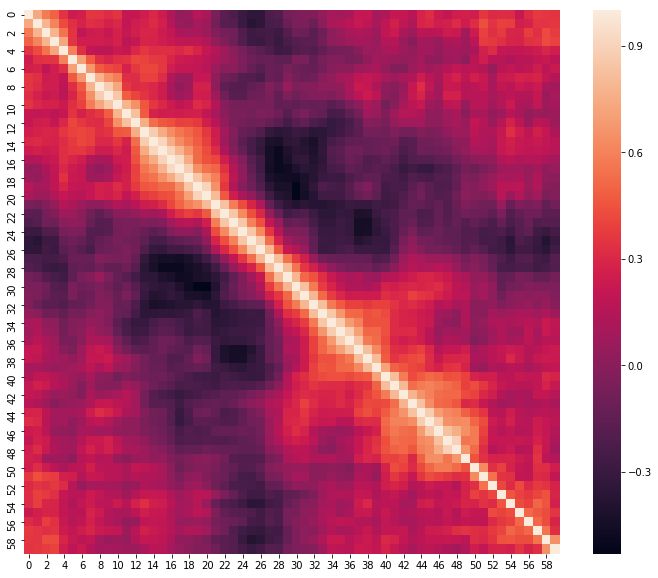

In [11]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr())

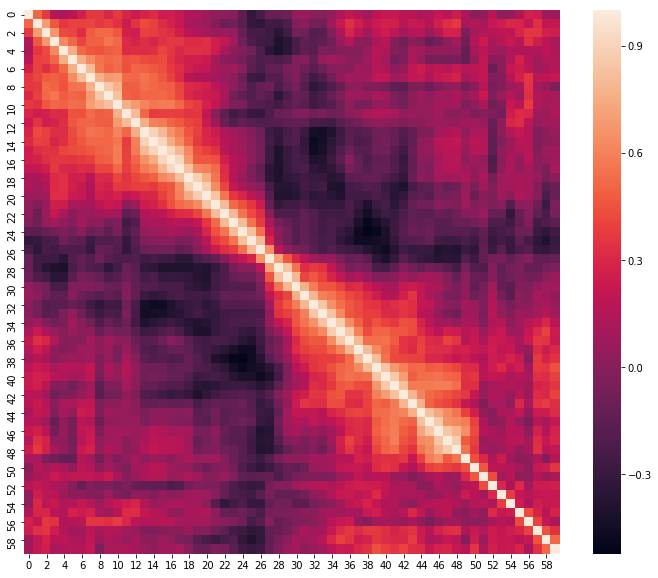

In [12]:
rock = data[data['label']=='R']

plt.figure(figsize=(12,10))
sns.heatmap(rock.corr())

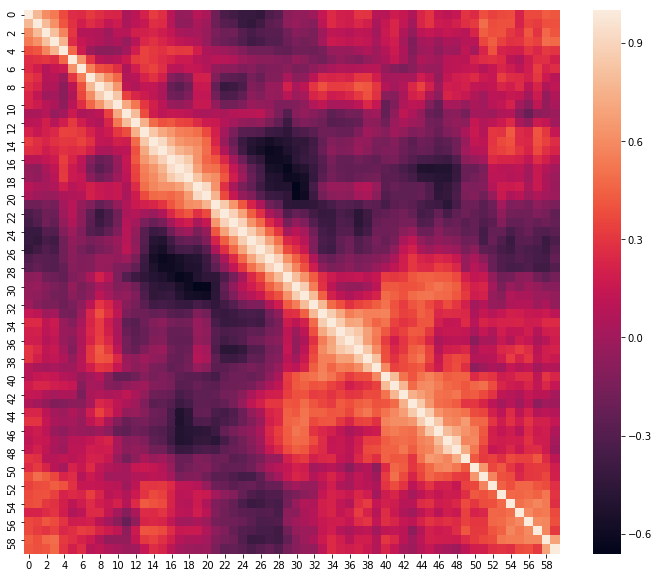

In [13]:
mine = data[data['label']=='M']

plt.figure(figsize=(12,10))
sns.heatmap(mine.corr())

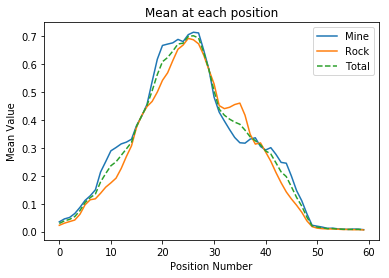

In [14]:
plt.plot(mine.mean())
plt.plot(rock.mean())
plt.plot(data.describe().iloc[1], '--')

plt.xlabel('Position Number')
plt.ylabel('Mean Value')
plt.title('Mean at each position')
plt.legend(['Mine','Rock','Total'])

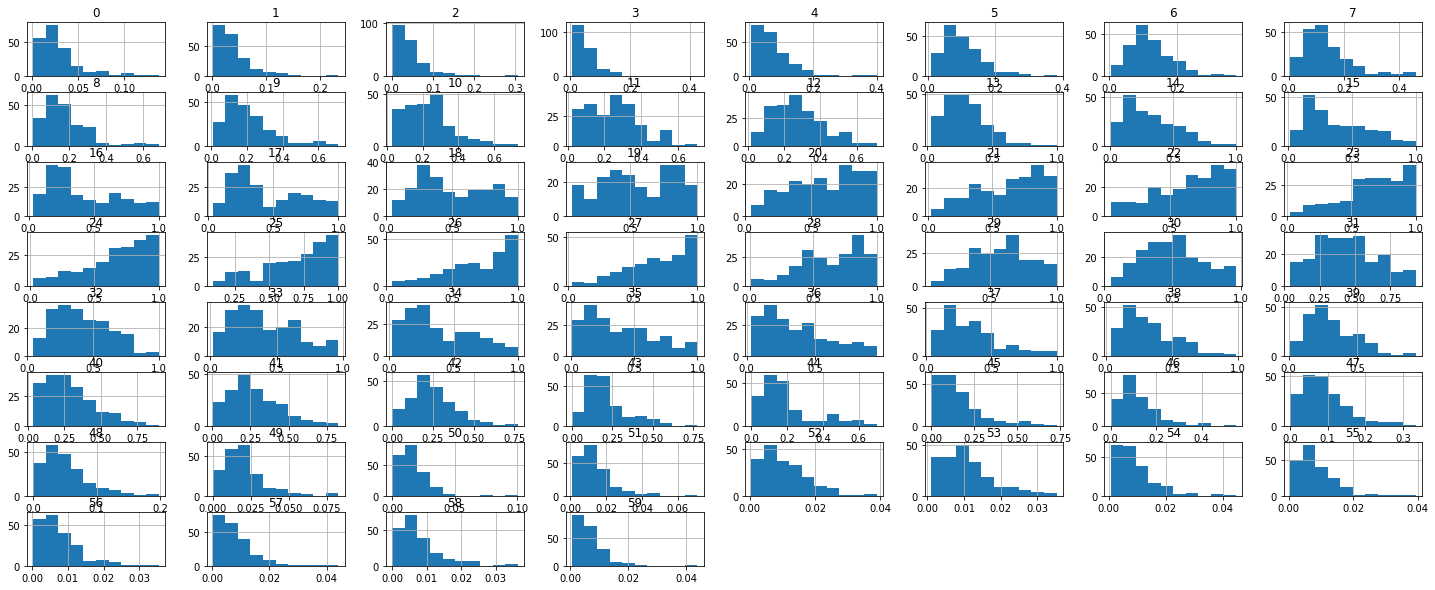

In [15]:
data.hist(figsize=(25,10))
plt.show()

# 2. Data Pre-processing

In [16]:
X = data.drop(['label'],axis=1)

y = data['label']

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.2, random_state=101)

# 3. Build Model

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [19]:
models = []

models.append(('LogReg', LogisticRegression()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=1)))
models.append(('NB', GaussianNB()))
models.append(('SVM',SVC()))

#### Evaluating Model Accuracy

In [20]:
# StratifiedKFold use for classification, KFold use for regression
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [21]:
# using k-fold of 10 for cross validation
results = []
names = []

for name, model in models:
    skfold = StratifiedKFold(n_splits=10,random_state=101, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=skfold, scoring='accuracy')

    results.append(cv_results)
    names.append(name)
    print(f'{name}: {cv_results.mean()} ({cv_results.std()})')

LogReg: 0.7180147058823529 (0.1140304633992381)
DTC: 0.7051470588235293 (0.11377830078755705)
RFC: 0.7352941176470589 (0.06514722480393141)
KNN: 0.8389705882352942 (0.09365696075347445)
NB: 0.6448529411764706 (0.10440399722557656)
SVM: 0.5602941176470588 (0.034847045914919966)


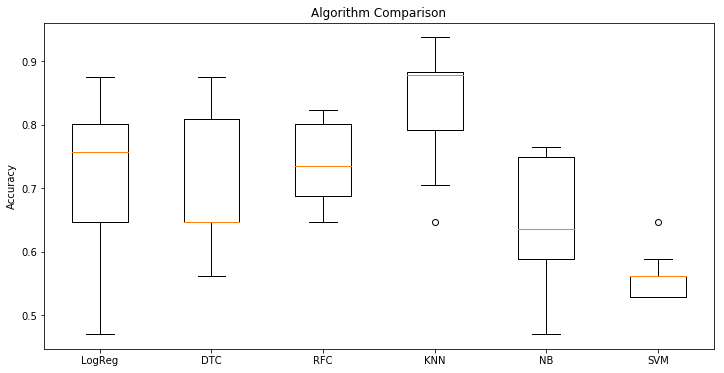

In [22]:
plt.figure(figsize=(12,6))
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.ylabel('Accuracy')
plt.show()

KNN shows the best result with a low variance and a high mean accuracy, but it has one outlier. RFC shows the second best result, with no outliers. 

These 2 models will be chosen for further evaluation.

# 4. Evaluation & Validation


In [23]:
from sklearn.metrics import classification_report, confusion_matrix

### 4.1 KNN

In [24]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train, y_train)

pred = knn.predict(X_test)

print(f'Training score: {knn.score(X_train, y_train)}')
print(f'Test score: {knn.score(X_test, y_test)}')

Training score: 1.0
Test score: 0.7380952380952381


In [25]:
# Evaluate predictions
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[16  5]
 [ 6 15]]
             precision    recall  f1-score   support

          M       0.73      0.76      0.74        21
          R       0.75      0.71      0.73        21

avg / total       0.74      0.74      0.74        42



#### Choosing K

##### Method: Error Rate

In [26]:
# find k
error_rate = []

for n in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train,y_train)
    pred_n = knn.predict(X_test)
    error_rate.append(np.mean(pred_n != y_test))

Text(0,0.5,'Error Rate')

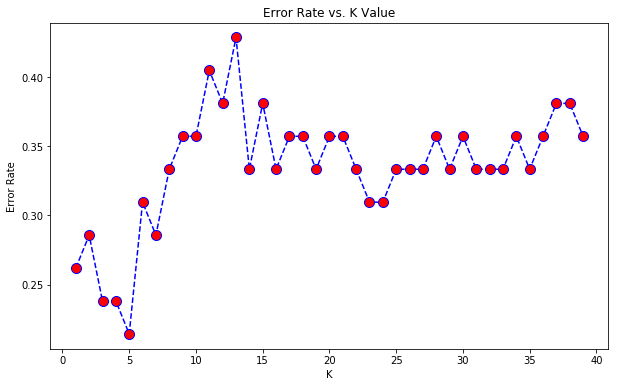

In [27]:
plt.figure(figsize=(10,6))

plt.plot(range(1,40),
         error_rate,color='blue', 
         linestyle='dashed', 
         marker='o',
         markerfacecolor='red', 
         markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')



K = 5 seems to show a lower error rate as compared to others.


In [28]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

pred = knn.predict(X_test)

print(f'Training score: {knn.score(X_train, y_train)}')
print(f'Test score: {knn.score(X_test, y_test)}')

Training score: 0.8734939759036144
Test score: 0.7857142857142857


In [29]:
# Evaluate predictions
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[17  4]
 [ 5 16]]
             precision    recall  f1-score   support

          M       0.77      0.81      0.79        21
          R       0.80      0.76      0.78        21

avg / total       0.79      0.79      0.79        42



##### Method: GridsearchCV

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
param_grid = {'n_neighbors': [n for n in range(1,41)]}

In [32]:
skfold = StratifiedKFold(n_splits=10,random_state=101, shuffle=True)

In [33]:
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=skfold)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=101, shuffle=True),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [34]:
grid_search.best_params_

{'n_neighbors': 1}

In [35]:
grid_search.best_score_

0.8373493975903614

In [36]:
grid_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

Using grid search, the best choce is when K = 1.

### 4.2 RFC

In [37]:
# find max_features sqrt(60) = around 8
error_rate = []
rfc_score = []

for n in range(1,11):
    rfc = RandomForestClassifier(max_features=n, random_state=101)
    rfc.fit(X_train, y_train)
    score = rfc.score(X_test, y_test)
    pred_n = rfc.predict(X_test)
    
    rfc_score.append(score)
    
    error_rate.append(np.mean(pred_n != y_test))

Text(0,0.5,'Error Rate')

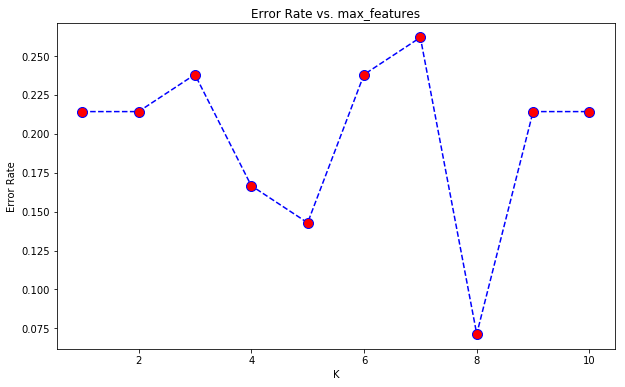

In [38]:
plt.figure(figsize=(10,6))

plt.plot(range(1,11),
         error_rate,color='blue', 
         linestyle='dashed', 
         marker='o',
         markerfacecolor='red', 
         markersize=10)

plt.title('Error Rate vs. max_features')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [39]:
for ix,n in enumerate(rfc_score):
    print(f'max_features = {ix + 1}, test score: {n}')

max_features = 1, test score: 0.7857142857142857
max_features = 2, test score: 0.7857142857142857
max_features = 3, test score: 0.7619047619047619
max_features = 4, test score: 0.8333333333333334
max_features = 5, test score: 0.8571428571428571
max_features = 6, test score: 0.7619047619047619
max_features = 7, test score: 0.7380952380952381
max_features = 8, test score: 0.9285714285714286
max_features = 9, test score: 0.7857142857142857
max_features = 10, test score: 0.7857142857142857


max_features = 8 seems to show a lower error rate as compared to others.

In [40]:
rfc = RandomForestClassifier(max_features=8, random_state=101)

rfc.fit(X_train, y_train)

pred = rfc.predict(X_test)

print(f'Training score: {rfc.score(X_train, y_train)}')
print(f'Test score: {rfc.score(X_test, y_test)}')

Training score: 0.9939759036144579
Test score: 0.9285714285714286


In [41]:
# Evaluate predictions
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[21  0]
 [ 3 18]]
             precision    recall  f1-score   support

          M       0.88      1.00      0.93        21
          R       1.00      0.86      0.92        21

avg / total       0.94      0.93      0.93        42



##### Method: GridsearchCV

In [42]:
param_grid = {'max_features': [n for n in range(1,11)]}

In [43]:
grid_search = GridSearchCV(RandomForestClassifier(random_state=101), param_grid, cv=skfold)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=101, shuffle=True),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=101, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [44]:
grid_search.best_params_

{'max_features': 6}

In [45]:
grid_search.best_score_

0.8012048192771084

In [46]:
result = pd.DataFrame(grid_search.cv_results_)

display(result.T)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\de

,0,1,2,3,4,5,6,7,8,9
mean_fit_time,0.0448273,0.0475319,0.04812,0.0483214,0.0491715,0.0493342,0.0494941,0.0500266,0.0510473,0.0521788
std_fit_time,0.00495443,0.00859623,0.00381754,0.00410681,0.00300168,0.00415532,0.00358187,0.00368792,0.00118475,0.00273309
mean_score_time,0.00534244,0.0018822,0.00389202,0.00229893,0.00228181,0.00385811,0.00271375,0.00351033,0.00309753,0.00433559
std_score_time,0.00699705,0.00380235,0.0053177,0.00360158,0.00311184,0.00567964,0.00396233,0.003884,0.00345432,0.00452987
param_max_features,1,2,3,4,5,6,7,8,9,10
params,{'max_features': 1},{'max_features': 2},{'max_features': 3},{'max_features': 4},{'max_features': 5},{'max_features': 6},{'max_features': 7},{'max_features': 8},{'max_features': 9},{'max_features': 10}
split0_test_score,0.823529,0.823529,0.705882,0.882353,0.705882,0.823529,0.764706,0.823529,0.823529,0.588235
split1_test_score,0.470588,0.705882,0.705882,0.764706,0.764706,0.647059,0.588235,0.764706,0.647059,0.705882
split2_test_score,0.764706,0.529412,0.647059,0.647059,0.647059,0.764706,0.705882,0.823529,0.823529,0.823529
split3_test_score,0.588235,0.647059,0.823529,0.764706,0.882353,0.882353,0.823529,0.882353,0.823529,0.764706


In [47]:
rfc = RandomForestClassifier(max_features=6, random_state=101)

rfc.fit(X_train, y_train)

pred = rfc.predict(X_test)

print(f'Training score: {rfc.score(X_train, y_train)}')
print(f'Test score: {rfc.score(X_test, y_test)}')

Training score: 0.9939759036144579
Test score: 0.7619047619047619


In [48]:
# Evaluate predictions
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[17  4]
 [ 6 15]]
             precision    recall  f1-score   support

          M       0.74      0.81      0.77        21
          R       0.79      0.71      0.75        21

avg / total       0.76      0.76      0.76        42



# 5. Build Model with data scaled

MinMaxScaler is chosen due to the overall input distribution is not normal.

In [52]:
from sklearn.preprocessing import MinMaxScaler

In [53]:
scaler = MinMaxScaler()

In [54]:
# scaled the data
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [55]:
results = []
names = []

for name, model in models:
    skfold = StratifiedKFold(n_splits=10,random_state=101, shuffle=True)
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=skfold, scoring='accuracy')

    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LogReg: 0.722794 (0.086818)
DTC: 0.700000 (0.110333)
RFC: 0.735294 (0.102770)
KNN: 0.862132 (0.059583)
NB: 0.644853 (0.104404)
SVM: 0.699265 (0.063653)


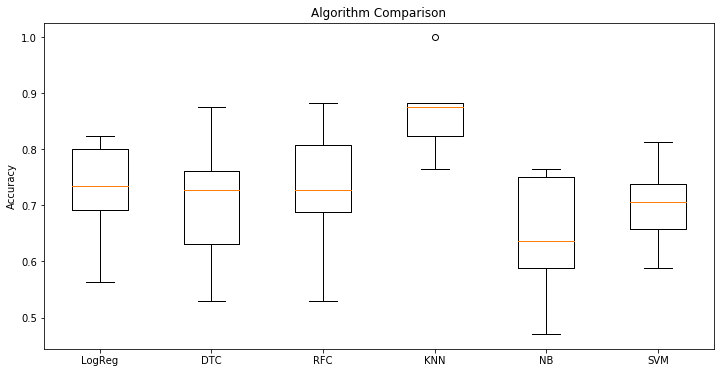

In [56]:
plt.figure(figsize=(12,6))
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.ylabel('Accuracy')
plt.show()

KNN still shows a low variance and high mean accuracy when the data is scaled.

# 6. Prediction & Evaluation

### 6.1 KNN

In [57]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train, y_train)

pred = knn.predict(X_test)

print(f'Training score: {knn.score(X_train, y_train)}')
print(f'Test score: {knn.score(X_test, y_test)}')

Training score: 1.0
Test score: 0.7380952380952381


In [58]:
# Evaluate predictions
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[16  5]
 [ 6 15]]
             precision    recall  f1-score   support

          M       0.73      0.76      0.74        21
          R       0.75      0.71      0.73        21

avg / total       0.74      0.74      0.74        42



#### Choosing K
##### Method: Error Rate

In [59]:
# find k
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled,y_train)
    pred_i = knn.predict(X_test_scaled)
    error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error Rate')

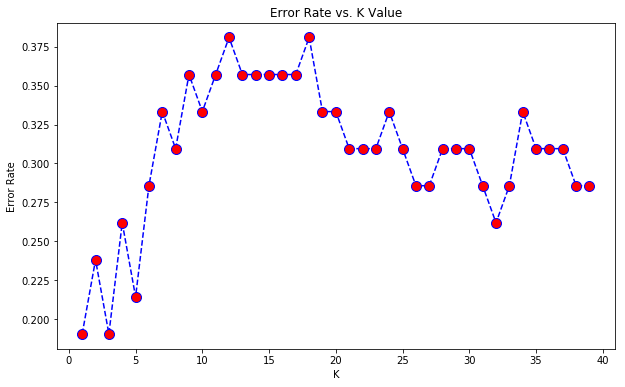

In [60]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

K = 1 has the lowest error rate compared to the others when the data is scaled.

In [61]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train_scaled, y_train)

pred = knn.predict(X_test_scaled)

print(f'Training score: {knn.score(X_train, y_train)}')
print(f'Test score: {knn.score(X_test, y_test)}')

Training score: 0.7891566265060241
Test score: 0.6190476190476191


In [62]:
# Evaluate predictions
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[17  4]
 [ 4 17]]
             precision    recall  f1-score   support

          M       0.81      0.81      0.81        21
          R       0.81      0.81      0.81        21

avg / total       0.81      0.81      0.81        42



##### Method: GridsearchCV

In [63]:
param_grid = {'n_neighbors': [n for n in range(1,41)]}

In [64]:
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=skfold)

grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=101, shuffle=True),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [65]:
grid_search.best_params_

{'n_neighbors': 1}

In [66]:
grid_search.best_score_

0.8614457831325302

After parameters tuning and scaling of data, KNN show to be the better choice.